<a href="https://colab.research.google.com/github/danisa-loop/DS/blob/main/TP_Individual_Putrino_DM_1C2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP de regresión (properati)
Programa de creación de entregas. Versión 1

In [1]:
import pandas as pd

import sklearn as sk
from sklearn import model_selection
from sklearn import ensemble
from sklearn import metrics

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Lectura de datos

In [3]:
DIR = "/content/drive/MyDrive/MDM/DM/DM"
# funcionan archivos .zip directamente

In [4]:
df_train = pd.read_csv(f"{DIR}/entrenamiento.csv", index_col="id")
df_train

,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,...,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,price
id,,,,,,,,,,,,,,,,,,,,,
556713,Propiedad,2019-11-29,9999-12-31,2019-11-29,-58.442399,-34.573623,Argentina,Capital Federal,Colegiales,NaN,...,2.0,NaN,NaN,USD,NaN,"Departamento en Venta en Belgrano, Capital fed...","Sup total por escritura: 96,47 m2 (cubiertos: ...",Departamento,Venta,259000.0
192912,Propiedad,2020-06-05,2020-06-08,2020-06-05,-58.430493,-34.606620,Argentina,Capital Federal,Almagro,NaN,...,2.0,77.0,67.0,USD,NaN,Departamento de 3 ambientes en Venta en Almagro,Excelente departamento de tres ambientes ampli...,Departamento,Venta,235500.0
238224,Propiedad,2020-07-01,9999-12-31,2020-07-01,-58.491760,-34.574123,Argentina,Capital Federal,Villa Urquiza,NaN,...,1.0,60.0,55.0,USD,NaN,Andonaegui 2600 4° - - Departamento en Venta,Excelente 3 ambientes al frente con balcón. Vi...,Departamento,Venta,175000.0
257134,Propiedad,2019-08-17,9999-12-31,2019-08-17,-58.420737,-34.631770,Argentina,Capital Federal,Boedo,NaN,...,1.0,74.0,47.0,USD,NaN,PH Venta Boedo 2 amb Patio,Corredor Responsable: MARCELO TRUJILLO - CPI ...,PH,Venta,140000.0
521738,Propiedad,2019-08-05,2019-08-31,2019-08-05,-58.429983,-34.607225,Argentina,Capital Federal,Almagro,NaN,...,1.0,66.0,64.0,USD,NaN,Venta 3 Ambientes - Almagro - Balcón - Ameniti...,Corredor Responsable: Marcelo Trujillo - CUCIC...,Departamento,Venta,173000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999996,Propiedad,2020-01-09,2020-04-27,2020-01-09,-57.575169,-38.042062,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,NaN,...,5.0,NaN,NaN,USD,NaN,Venta en Bloque,Venta en bloque de esta importante propiedad. ...,Casa,Venta,190000.0
999997,Propiedad,2020-01-09,2020-04-27,2020-01-09,-68.860929,-32.953935,Argentina,Mendoza,Cuadro Benegas,NaN,...,5.0,NaN,NaN,USD,NaN,PALMARES SEGUNDA ETAPA,RIVEROS PROPIEDADES VENDE: Casa Desarrollada E...,Casa,Venta,520000.0
999998,Propiedad,2020-01-09,2020-04-27,2020-01-09,-57.963191,-34.920051,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,NaN,...,5.0,NaN,NaN,ARS,NaN,"Departamento en Alquiler, 44mts, 0 dormitorios...",16 N&deg;706 y 46 se alquila monoambiente e...,Departamento,Alquiler,12000.0


In [5]:
df_test = pd.read_csv(f"{DIR}/a_predecir.csv", index_col="id")
df_test.head()

,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,...,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,price
id,,,,,,,,,,,,,,,,,,,,,
736772,Propiedad,2020-01-18,2020-09-20,2020-01-18,-58.452877,-34.644650,Argentina,Capital Federal,Flores,NaN,...,1.0,61.0,53.0,USD,NaN,Varela 1400 PB - U$D 98.000 - Tipo casa PH e...,Departamento tipo casa en Flores. Excelente es...,Casa,Venta,NaN
333658,Propiedad,2019-07-21,2020-02-08,2019-07-21,-58.500027,-34.628754,Argentina,Capital Federal,Floresta,NaN,...,3.0,198.0,124.0,USD,NaN,Cervantes 1000 duplex - U$D 299.900 - Tipo ...,CERVANTES 1047entre Murature y Cesar Diaz cerq...,Casa,Venta,NaN
195920,Propiedad,2020-05-19,2020-09-23,2020-05-19,-58.496326,-34.582832,Argentina,Capital Federal,Villa Pueyrredón,NaN,...,NaN,145.0,115.0,USD,NaN,Av Gral Mosconi 2400 - U$D 215.000 - Tipo cas...,"Avenida mosconi 2400 ,Villa pueyrredon ph cont...",Casa,Venta,NaN
613603,Propiedad,2019-09-11,2019-09-18,2019-09-11,-58.480350,-34.685078,Argentina,Capital Federal,Villa Lugano,NaN,...,3.0,251.0,200.0,USD,NaN,Guamini 4600 - U$D 330.000 - Casa en Venta,EXCEPCIONAL CASA A TERMINAR DE 5 AMBIENTES CO...,Casa,Venta,NaN
15011,Propiedad,2019-11-25,2020-03-04,2019-11-25,-58.509136,-34.599274,Argentina,Capital Federal,Villa Devoto,NaN,...,3.0,440.0,270.0,USD,NaN,Joaquin V Gonzalez 3900 - U$D 700.000 - Casa ...,"RETIRO 10 X 5 - INGRESO - HALL - LIVING 6 X 5,...",Casa,Venta,NaN


## Análisis de datos a predecir en test

In [6]:
df_test.describe()

,lat,lon,l5,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,price_period,price
count,7376.000000,7376.000000,0.0,0.0,7283.000000,5616.000000,7510.000000,7716.000000,7688.000000,0.0,0.0
mean,-58.444166,-34.595738,NaN,NaN,2.457092,1.883725,1.395206,77.641135,70.573621,NaN,NaN
std,0.238392,0.058466,NaN,NaN,1.242464,0.990882,0.751704,72.653393,153.376816,NaN,NaN
min,-68.468140,-34.693653,NaN,NaN,1.000000,1.000000,1.000000,10.000000,3.000000,NaN,NaN
25%,-58.456245,-34.609496,NaN,NaN,2.000000,1.000000,1.000000,40.000000,37.000000,NaN,NaN
50%,-58.435292,-34.598219,NaN,NaN,2.000000,2.000000,1.000000,56.000000,50.000000,NaN,NaN
75%,-58.415889,-34.584320,NaN,NaN,3.000000,2.000000,2.000000,86.000000,77.000000,NaN,NaN
max,-58.358672,-31.923561,NaN,NaN,21.000000,11.000000,7.000000,1350.000000,8300.000000,NaN,NaN


In [7]:
df_test.columns.sort_values()

Index(['ad_type', 'bathrooms', 'bedrooms', 'created_on', 'currency',
       'description', 'end_date', 'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'lat',
       'lon', 'operation_type', 'price', 'price_period', 'property_type',
       'rooms', 'start_date', 'surface_covered', 'surface_total', 'title'],
      dtype='object')

In [8]:
# Veo el tipo de moneda de los datos
df_test.currency.value_counts()

currency
USD    7801
ARS       7
Name: count, dtype: int64

In [9]:
#Tipo de operación
df_test.operation_type.value_counts()

operation_type
Venta    7808
Name: count, dtype: int64

In [10]:
df_test.property_type.value_counts()

property_type
Departamento    7277
Casa             405
Cochera          126
Name: count, dtype: int64

In [11]:
df_test.groupby(["l1", "l2", "l3"])[["rooms"]].median()

rooms
l1        l2              l3                         
Argentina Capital Federal Abasto                  1.0
                          Agronomía               2.0
                          Almagro                 2.0
                          Balvanera               2.0
                          Barracas                3.0
                          Barrio Norte            3.0
                          Belgrano                3.0
                          Boca                    2.0
                          Boedo                   2.0
                          Caballito               2.0
                          Centro / Microcentro    2.0
                          Chacarita               2.0
                          Coghlan                 2.0
                          Colegiales              1.0
                          Congreso                2.0
                          Constitución            2.0
                          Flores                  2.0
                          Floresta                2.0
                          Las Cañitas             3.0
                          Liniers                 3.0
                          Mataderos               3.0
                          Monserrat               2.0
                          Monte Castro            2.0
                          Nuñez                   2.0
                          Once                    3.0
                          Palermo                 2.0
                          Parque Avellaneda       3.0
                          Parque Centenario       3.0
                          Parque Chacabuco        1.5
                          Parque Chas             2.0
                          Parque Patricios        3.0
                          Paternal                2.0
                          Pompeya                 1.0
                          Puerto Madero           3.0
                          Recoleta                3.0
                          Retiro                  3.0
                          Saavedra                2.0
                          San Cristobal           2.0
                          San Nicolás             2.0
                          San Telmo               2.0
                          Tribunales              3.0
                          Velez Sarsfield         3.0
                          Versalles               3.0
                          Villa Crespo            2.0
                          Villa Devoto            2.0
                          Villa General Mitre     2.0
                          Villa Lugano            3.0
                          Villa Luro              2.0
                          Villa Ortuzar           2.0
                          Villa Pueyrredón        2.0
                          Villa Real              2.0
                          Villa Riachuelo         NaN
                          Villa Santa Rita        2.0
                          Villa Urquiza           2.0
                          Villa del Parque        2.0

In [12]:
#Valores de l4
df_test.l4.value_counts()

l4
Palermo Soho         131
Palermo Hollywood    114
Palermo Chico         33
Palermo Viejo         18
Name: count, dtype: int64

## Genero máscaras para filtrar el df de train con los datos a predecir

In [13]:
#Genero filtros para el df de train basados en los datos de test a predecir
filtro_1 = (df_train.operation_type == "Venta")
filtro_2 = (df_train.property_type == "Departamento") | (df_train.property_type == "Casa") | (df_train.property_type == "Cochera")
filtro_3 = (df_train.l1 == "Argentina") & (df_train.l2 == "Capital Federal")

In [14]:
df_train_filtrado = df_train.loc[filtro_1 & filtro_2 & filtro_3]
df_train_filtrado

,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,...,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,price
id,,,,,,,,,,,,,,,,,,,,,
556713,Propiedad,2019-11-29,9999-12-31,2019-11-29,-58.442399,-34.573623,Argentina,Capital Federal,Colegiales,NaN,...,2.0,NaN,NaN,USD,NaN,"Departamento en Venta en Belgrano, Capital fed...","Sup total por escritura: 96,47 m2 (cubiertos: ...",Departamento,Venta,259000.0
192912,Propiedad,2020-06-05,2020-06-08,2020-06-05,-58.430493,-34.606620,Argentina,Capital Federal,Almagro,NaN,...,2.0,77.0,67.0,USD,NaN,Departamento de 3 ambientes en Venta en Almagro,Excelente departamento de tres ambientes ampli...,Departamento,Venta,235500.0
238224,Propiedad,2020-07-01,9999-12-31,2020-07-01,-58.491760,-34.574123,Argentina,Capital Federal,Villa Urquiza,NaN,...,1.0,60.0,55.0,USD,NaN,Andonaegui 2600 4° - - Departamento en Venta,Excelente 3 ambientes al frente con balcón. Vi...,Departamento,Venta,175000.0
521738,Propiedad,2019-08-05,2019-08-31,2019-08-05,-58.429983,-34.607225,Argentina,Capital Federal,Almagro,NaN,...,1.0,66.0,64.0,USD,NaN,Venta 3 Ambientes - Almagro - Balcón - Ameniti...,Corredor Responsable: Marcelo Trujillo - CUCIC...,Departamento,Venta,173000.0
499733,Propiedad,2019-07-24,9999-12-31,2019-07-24,-58.404054,-34.599623,Argentina,Capital Federal,Barrio Norte,NaN,...,2.0,91.0,86.0,USD,Mensual,Tres ambientes de categoria en Barrio Norte,Excelente y amplio departamento de tres ambien...,Departamento,Venta,190000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999989,Propiedad,2020-01-09,9999-12-31,2020-01-09,-58.405182,-34.576273,Argentina,Capital Federal,Palermo,Palermo Chico,...,5.0,320.0,311.0,USD,Mensual,Departamento - Palermo Chico,TORRE LE PARC ALCORTA<br><br>Palier Privado<br...,Departamento,Venta,4200000.0
999991,Propiedad,2020-01-09,9999-12-31,2020-01-09,-58.438501,-34.552132,Argentina,Capital Federal,Belgrano,NaN,...,5.0,330.0,300.0,USD,Mensual,Departamento - Belgrano Chico,Edificio en torre<br>Seguridad 24 hrs<br>Parqu...,Departamento,Venta,3500000.0
999992,Propiedad,2020-01-09,2020-04-27,2020-01-09,NaN,NaN,Argentina,Capital Federal,NaN,NaN,...,5.0,NaN,NaN,USD,NaN,Barbaro Vende casa 6 ambientes en San Martin,Barbaro Vende Casa de 5 Dormitorio(s) de 3x...,Casa,Venta,235000.0


In [16]:
df_train_filtrado.to_csv("df_train_filtrado", index=False)

## Trabajo con el df de train posta, el filtrado

In [17]:
df_train_posta = pd.read_csv("df_train_filtrado")

# 1. Entender los datos (AID) -- 🔎🔎🔎 MODIFICAR 🔎🔎🔎

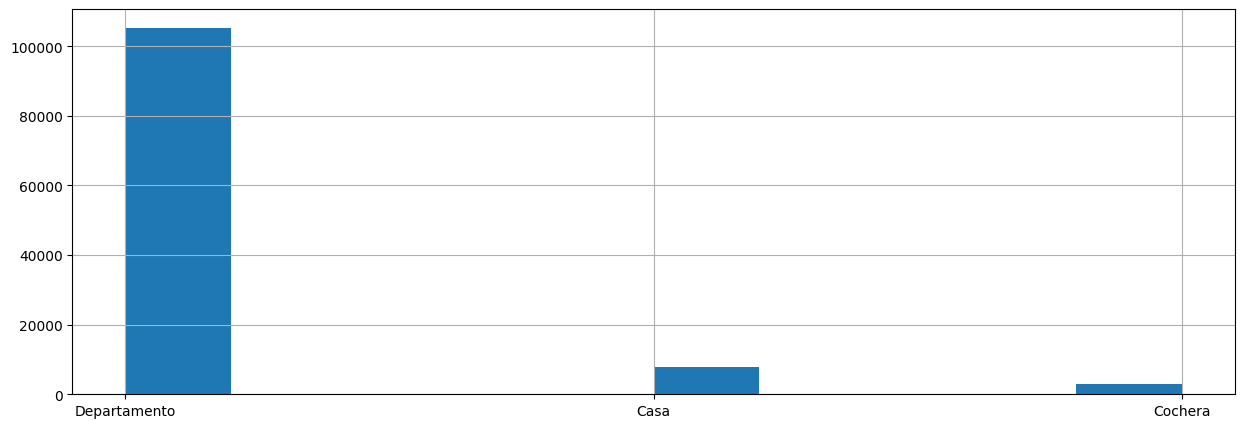

In [18]:
df_train_posta["property_type"].hist(figsize=(15,5));

# 2. Limpieza y transformación de datos (MD) -- 🧹🧹🧹 MODIFICAR 🧹🧹🧹

In [19]:
# Selección de datos. Solo a fines demostrativos. Cambiar!
#df_train = df_train.loc[(df_train["l2"] == "Córdoba") & (df_train["operation_type"] == 'Venta') & (df_train["property_type"] == "Casa")]
print(df_train_posta.shape)
print(round(df_train_posta.shape[0]/df_train.shape[0]*100, 2), "% del df original con el que trabajamos")

(116213, 24)
11.71 % del df original con el que trabajamos


In [20]:
#Evalúo valores nulos en train
df_train_posta.isna().sum()

ad_type                 0
start_date              0
end_date                0
created_on              0
lat                 10749
lon                 10687
l1                      7
l2                      7
l3                   6596
l4                 111387
l5                 116213
l6                 116213
rooms               12187
bedrooms            38595
bathrooms            8587
surface_total       29204
surface_covered     27742
currency             4362
price_period        73083
title                  20
description             7
property_type          14
operation_type         14
price                3719
dtype: int64

In [21]:
#Precio no se puede imputar porque es lo que quiero predecir, así que esos registros los elimino
df_train_posta_2 = df_train_posta[~df_train_posta["price"].isna()]

In [22]:
df_train_posta_2.groupby(["property_type"])[["price"]].median()

,price
property_type,
Casa,320000.0
Cochera,23800.0
Departamento,151900.0


In [23]:
df_train_posta_2.groupby(["property_type"])[["price"]].describe()

price                                                 \
                  count           mean           std     min       25%   
property_type                                                            
Casa             7513.0  486928.211899  1.892074e+06     0.0  200000.0   
Cochera          2989.0   38076.541318  1.260449e+05  5000.0   19000.0   
Departamento   101992.0  310216.227400  9.773928e+05     0.0  105000.0   

                                                
                    50%       75%          max  
property_type                                   
Casa           320000.0  498000.0  111111111.0  
Cochera         23800.0   29350.0    2800000.0  
Departamento   151900.0  249000.0   44716815.0

In [48]:
df_train_posta_casa = df_train_posta_2.loc[(df_train_posta_2["property_type"]=="Casa") & (df_train_posta_2["price"]<1200000) & (df_train_posta_2["price"]>100000)]
df_train_posta_cochera = df_train_posta_2.loc[(df_train_posta_2["property_type"]=="Cochera") & (df_train_posta_2["price"]<60000) & (df_train_posta_2["price"]>5000)]
df_train_posta_dep = df_train_posta_2.loc[(df_train_posta_2["property_type"]=="Departamento") & (df_train_posta_2["price"]<500000) & (df_train_posta_2["price"]>50000)]

In [49]:
df_train_pipi = pd.concat([df_train_posta_casa, df_train_posta_cochera, df_train_posta_dep])
df_train_pipi

,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,...,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,price
4826,Propiedad,2019-07-07,2019-07-10,2019-07-07,-58.467001,-34.545308,Argentina,Capital Federal,Nuñez,NaN,...,3.0,146.0,130.0,USD,Mensual,CASA EN VENTA,CASA EN VENTA | NUÑEZ - Capital Federal | ...,Casa,Venta,395000.0
4910,Propiedad,2019-07-07,2019-07-09,2019-07-07,-58.460201,-34.599007,Argentina,Capital Federal,Paternal,NaN,...,2.0,411.0,220.0,USD,NaN,Casa de 4 ambientes en Venta en Paternal,Excelente casa desarrollada en lote propio ubi...,Casa,Venta,285100.0
4938,Propiedad,2020-06-21,2020-06-27,2020-06-21,-58.459587,-34.550033,Argentina,Capital Federal,Nuñez,NaN,...,5.0,NaN,210.0,USD,NaN,"VENTA - CASA 5 AMBIENTES CON COCHERA, PATIO, T...",******AMPLIA Y MODERNA CASA DE DISEÑO VANGUARD...,Casa,Venta,650000.0
4939,Propiedad,2020-06-21,2020-06-27,2020-06-21,NaN,NaN,Argentina,Capital Federal,Palermo,Palermo Viejo,...,1.0,286.0,160.0,USD,NaN,Casa de 4 ambientes en Venta en Palermo viejo,TRIPLEX EN MEDIO TERRENO DE 4 AMB MUY AMPLIOS...,Casa,Venta,475000.0
4940,Propiedad,2020-06-21,2020-06-27,2020-06-21,-58.426576,-34.590987,Argentina,Capital Federal,Palermo,NaN,...,5.0,444.0,270.0,USD,NaN,Casa de 8 ambientes en Venta en Palermo,OPORTUNIDAD!! Edificio en Block desarrollado e...,Casa,Venta,650000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116180,Propiedad,2020-01-09,2020-04-27,2020-01-09,NaN,NaN,Argentina,Capital Federal,NaN,NaN,...,3.0,NaN,NaN,USD,NaN,EXCELENTE PISO -DEPARTAMENTO y COCHERA BOSCH...,Excelente propiedad en 1er piso con entrada de...,Departamento,Venta,200000.0
116181,Propiedad,2020-01-09,2020-04-27,2020-01-09,NaN,NaN,Argentina,Capital Federal,NaN,NaN,...,3.0,NaN,NaN,USD,NaN,DEPARTAMENTO 5 AMB A ESTRENAR 150M2 300m estacion,Excelente departamento SEMIPISO de 150m2 CON 3...,Departamento,Venta,300000.0
116182,Propiedad,2020-01-09,2020-04-27,2020-01-09,NaN,NaN,Argentina,Capital Federal,NaN,NaN,...,3.0,NaN,NaN,USD,NaN,19 De Noviembre 100 5° - U$D 335.000 - Depar...,"Edificio con entrada de cortesía, ubicado a me...",Departamento,Venta,335000.0
116197,Propiedad,2020-01-09,9999-12-31,2020-01-09,NaN,NaN,Argentina,Capital Federal,NaN,NaN,...,4.0,NaN,NaN,USD,NaN,Piso en Alem 4 a la venta,"En Alem 4 se encuentra este piso alto, con gra...",Departamento,Venta,465000.0


<Axes: title={'center': 'price'}, xlabel='property_type'>

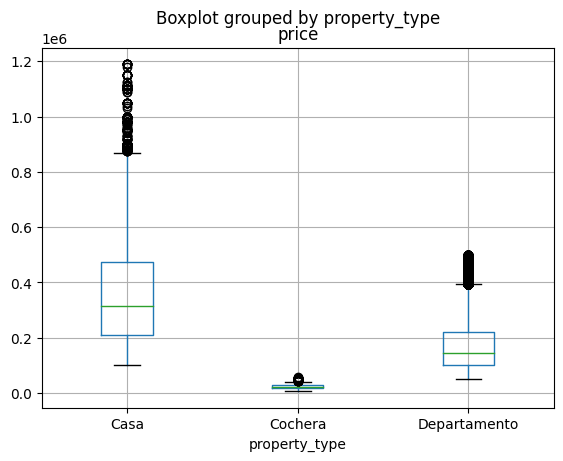

In [50]:
df_train_pipi.boxplot(column="price", by="property_type")

<Axes: >

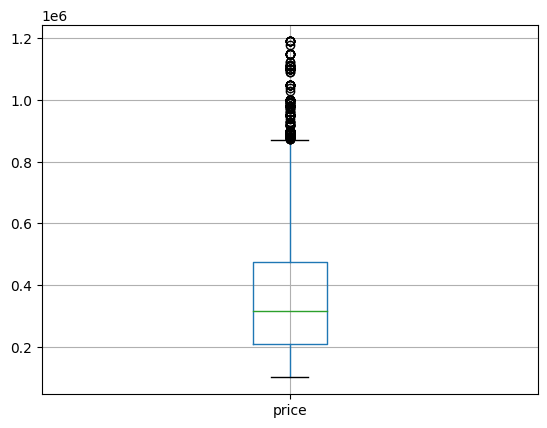

In [51]:
df_train_posta_casa.boxplot(column="price")

<Axes: >

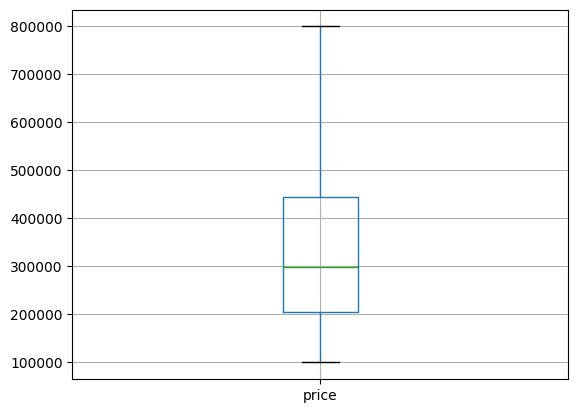

In [57]:
df_train_posta_casa.loc[df_train_posta_casa["price"]<800000].boxplot(column="price")

<Axes: >

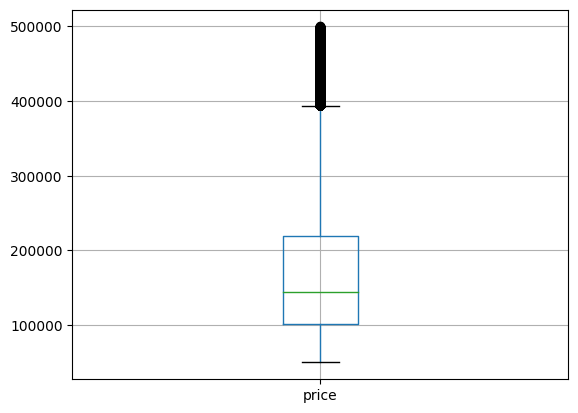

In [59]:
df_train_posta_dep.boxplot(column="price")

<Axes: >

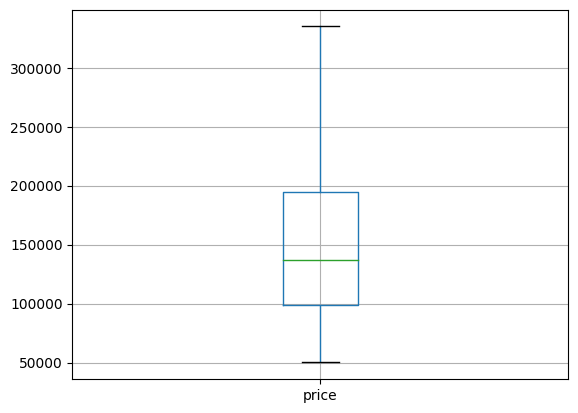

In [63]:
df_train_posta_dep.loc[df_train_posta_dep["price"]<335000].boxplot(column="price")

<Axes: >

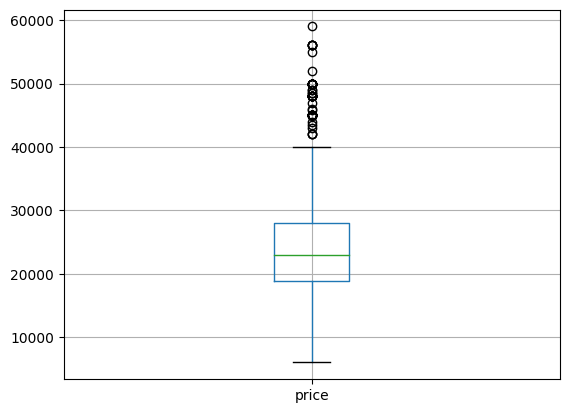

In [64]:
df_train_posta_cochera.boxplot(column="price")

<Axes: >

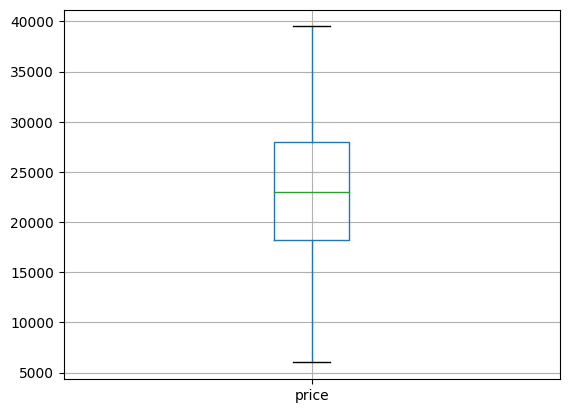

In [66]:
df_train_posta_cochera.loc[df_train_posta_cochera["price"]<40000].boxplot(column="price")

In [71]:
#AJusto las máscaras
df_train_posta_casa_2 = df_train_posta_2.loc[(df_train_posta_2["property_type"]=="Casa") & (df_train_posta_2["price"]<800000) & (df_train_posta_2["price"]>100000)]
df_train_posta_cochera_2 = df_train_posta_2.loc[(df_train_posta_2["property_type"]=="Cochera") & (df_train_posta_2["price"]<40000) & (df_train_posta_2["price"]>5000)]
df_train_posta_dep_2 = df_train_posta_2.loc[(df_train_posta_2["property_type"]=="Departamento") & (df_train_posta_2["price"]<335000) & (df_train_posta_2["price"]>50000)]

In [72]:
df_train_pipi_2 = pd.concat([df_train_posta_casa_2, df_train_posta_cochera_2, df_train_posta_dep_2])
df_train_pipi_2

,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,...,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,price
4826,Propiedad,2019-07-07,2019-07-10,2019-07-07,-58.467001,-34.545308,Argentina,Capital Federal,Nuñez,NaN,...,3.0,146.0,130.0,USD,Mensual,CASA EN VENTA,CASA EN VENTA | NUÑEZ - Capital Federal | ...,Casa,Venta,395000.0
4910,Propiedad,2019-07-07,2019-07-09,2019-07-07,-58.460201,-34.599007,Argentina,Capital Federal,Paternal,NaN,...,2.0,411.0,220.0,USD,NaN,Casa de 4 ambientes en Venta en Paternal,Excelente casa desarrollada en lote propio ubi...,Casa,Venta,285100.0
4938,Propiedad,2020-06-21,2020-06-27,2020-06-21,-58.459587,-34.550033,Argentina,Capital Federal,Nuñez,NaN,...,5.0,NaN,210.0,USD,NaN,"VENTA - CASA 5 AMBIENTES CON COCHERA, PATIO, T...",******AMPLIA Y MODERNA CASA DE DISEÑO VANGUARD...,Casa,Venta,650000.0
4939,Propiedad,2020-06-21,2020-06-27,2020-06-21,NaN,NaN,Argentina,Capital Federal,Palermo,Palermo Viejo,...,1.0,286.0,160.0,USD,NaN,Casa de 4 ambientes en Venta en Palermo viejo,TRIPLEX EN MEDIO TERRENO DE 4 AMB MUY AMPLIOS...,Casa,Venta,475000.0
4940,Propiedad,2020-06-21,2020-06-27,2020-06-21,-58.426576,-34.590987,Argentina,Capital Federal,Palermo,NaN,...,5.0,444.0,270.0,USD,NaN,Casa de 8 ambientes en Venta en Palermo,OPORTUNIDAD!! Edificio en Block desarrollado e...,Casa,Venta,650000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116160,Propiedad,2020-01-09,2020-02-13,2020-01-09,-58.396341,-34.610530,Argentina,Capital Federal,Balvanera,NaN,...,3.0,107.0,107.0,USD,NaN,"Muy luminoso! Piso de 6 ambientes en esquina, ...",En un solido y fuerte edificio racionalista en...,Departamento,Venta,205000.0
116161,Propiedad,2020-01-09,2020-02-18,2020-01-09,NaN,NaN,Argentina,Capital Federal,NaN,NaN,...,3.0,NaN,NaN,USD,NaN,SEMIPISO CENTRICO,O'HIGGINS N&ordm; 243: Excelente semipiso en t...,Departamento,Venta,220000.0
116170,Propiedad,2020-01-09,9999-12-31,2020-01-09,-58.981432,-27.446867,Argentina,Capital Federal,NaN,NaN,...,3.0,NaN,NaN,USD,NaN,VENTA DEPTO 3 DORMITORIOS + 2 COCHERAS - SARMI...,Puente Inmobiliaria vende AMPLIO y LUMINOSO DE...,Departamento,Venta,250000.0
116180,Propiedad,2020-01-09,2020-04-27,2020-01-09,NaN,NaN,Argentina,Capital Federal,NaN,NaN,...,3.0,NaN,NaN,USD,NaN,EXCELENTE PISO -DEPARTAMENTO y COCHERA BOSCH...,Excelente propiedad en 1er piso con entrada de...,Departamento,Venta,200000.0


In [73]:
df_train_pipi_2.property_type.value_counts()

property_type
Departamento    84514
Casa             6372
Cochera          2795
Name: count, dtype: int64

<Axes: title={'center': 'price'}, xlabel='property_type'>

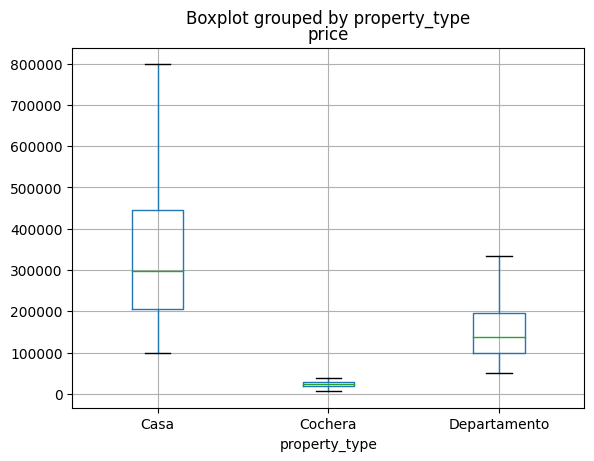

In [74]:
df_train_pipi_2.boxplot(column="price", by="property_type")

In [75]:
# La creación de modelos requiere que no haya valores perdidos
# Llenamos todo con 0 a lo bestia
# TODO: mejorar la imputación de valores perdidos
df_train_pipi_2.fillna(0, inplace=True, downcast= "infer")
df_test.fillna(0, inplace=True, downcast= "infer")

# 3. Entrenamiento del modelos (AA) -- ⛔⛔⛔ NO TOCAR ⛔⛔⛔

In [76]:
# La creación de modelos requiere que todo el dataframe sea numérico
# Me quedo con las columnas numéricas solamente
# TODO: traducir las columnas con datos no numéricos a numéricos para que mejoren los modelos
df_train = df_train_pipi_2.select_dtypes(include=['float64', 'int64', 'int32', 'int16', 'int8', 'bool'])

X = df_train[df_train.columns.drop('price')]
y = df_train['price']

In [ ]:
for n_estimators in [50, 100, 500, 1000]:
    for max_depth in [5, 10, 15, 30]:
        print(f"{n_estimators=} -- {max_depth=}")

        # Creamos el modelo
        reg = sk.ensemble.RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, n_jobs=-1, random_state=42)

        scores_train = []
        scores_test = []

        # Validación cruzada, 10 folds, shuffle antes, semilla aleatoria
        kf = sk.model_selection.KFold(n_splits=10, shuffle=True, random_state=42)

        for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
            # Partimos el fold en entrenamiento y prueba...
            X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

            # Entrenamos el modelo en entramiento
            reg.fit(X_train, y_train)

            # Predecimos en train
            y_pred = reg.predict(X_train)

            # Medimos la performance de la predicción en entramiento
            score_train = sk.metrics.mean_squared_error(y_train, y_pred, squared=False)
            scores_train.append(score_train)

            # Predecimos en test
            y_pred = reg.predict(X_test)

            # Medimos la performance de la predicción en prueba
            score_test = sk.metrics.mean_squared_error(y_test, y_pred, squared=False)
            scores_test.append(score_test)

            print("\t", f"{fold=}, {score_train=} {score_test=}")

        print(f"Media de scores en entrenamiento={pd.Series(scores_train).mean()}, std={pd.Series(scores_train).std()}")
        print(f"Media de scores en prueba={pd.Series(scores_test).mean()}, std={pd.Series(scores_test).std()}")
        print()

# 4. Predicción para kaggle -- ⚠️⚠️⚠️ MODIFICAR HIPERPARÁMETROS ⚠️⚠️⚠️


In [77]:
## Datos a predecir
X = df_train[df_train.columns.drop('price')]
y = df_train['price']

X_test = df_test[df_train.columns.drop('price')]

# Entrenamos el modelo usando todos los datos de entrenamiento
# TODO: Poner los valores de hiperparámetros que mejor dieron en el paso anterior
n_estimators = 50
max_depth = 10
reg = sk.ensemble.RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, n_jobs=-1, random_state=42)
reg.fit(X, y)

# Predecimos
df_test['price'] = reg.predict(X_test)

# Creamos el dataframe para entregar
df_sol = df_test[["price"]]

In [78]:
# Tests de validación de la predicción antes de subirla
# Estos tests TIENEN que pasar sin error

assert (df_sol["price"] <= 0).sum() == 0, "Hay predicciones de precios menores o iguales a 0."
assert df_sol.shape[0] == 7808, f"La cantidad de filas no es correcta. Es {df_sol.shape[0]} y debe ser 7808."
assert df_sol.shape[1] == 1, f"La cantidad de columnas no es correcta. Es {df_sol.shape[1]} y debe ser 1."
assert 'price' in df_sol.columns, "Falta la columna 'price'."
assert df_sol.index.name == 'id', "El índice debe llamarse 'id'."

In [ ]:
# Grabamos el archivo para subir a kaggle
# TODO: Cambiar la versión y llevar registro

version = "v001"
df_test['price'].to_csv(f"{DIR}/solucion-{version}.csv", index=True)